In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

def clean_csv_data(file_path):
    # Load the data from the CSV file
    df = pd.read_csv(file_path)
    
    # Drop rows with missing values
    cleaned_df = df.dropna()
    
    return cleaned_df

# Usage:
cleaned_data = clean_csv_data('replicationData.csv')

In [3]:
cleaned_data

,isocode,country,ln_maddison_pcgdp2000,ln_export_area,ln_export_pop,colony0,colony1,colony2,colony3,colony4,...,ln_avg_oil_pop,ln_avg_all_diamonds_pop,ln_pop_dens_1400,atlantic_distance_minimum,indian_distance_minimum,saharan_distance_minimum,red_sea_distance_minimum,ethnic_fractionalization,state_dev,land_area
0,AGO,Angola,6.670766,7.967493,14.399250,0.0,0.0,0.0,1.0,0.0,...,0.643126,-1.701396,-0.024917,5.668760,6.980571,4.925892,3.872354,0.7867,0.635,1.25000
1,BDI,Burundi,6.354370,1.140843,4.451658,0.0,0.0,0.0,0.0,1.0,...,-9.210340,-6.907755,3.036856,10.626214,2.570375,3.718742,2.215324,0.2951,0.995,0.02780
2,BEN,Benin,7.187657,8.304137,13.308970,0.0,0.0,1.0,0.0,0.0,...,-3.531555,-6.907755,1.214196,5.120652,9.233961,2.834785,3.901736,0.7872,0.695,0.11300
3,BFA,Burkina Faso,6.748760,6.413822,11.724286,0.0,0.0,1.0,0.0,0.0,...,-9.210340,-6.907755,0.908565,4.774938,9.299419,2.763519,4.239375,0.7377,0.338,0.27400
4,BWA,Botswana,8.377471,-2.302585,3.912023,0.0,1.0,0.0,0.0,0.0,...,-9.210340,2.186849,-2.075029,5.686335,5.764576,5.856533,4.299600,0.4102,0.893,0.60000
5,CAF,Central African Republic,6.472346,1.171314,8.052058,0.0,0.0,1.0,0.0,0.0,...,-9.210340,-1.849576,-0.473905,5.642056,8.772295,2.840084,2.293167,0.8295,0.144,0.62300
6,CIV,Ivory Coast,7.189922,5.096793,10.843699,0.0,0.0,1.0,0.0,0.0,...,-3.270892,-4.228216,0.472123,4.185696,9.457085,3.353074,4.793966,0.8204,0.082,0.32200
7,CMR,Cameroon,7.016610,4.944928,10.331063,0.0,0.0,1.0,0.0,0.0,...,-0.871162,-6.907755,1.020704,5.642056,8.772295,3.002548,3.051031,0.8635,0.316,0.47500
8,COG,Congo,7.702556,5.623267,12.391068,0.0,0.0,1.0,0.0,0.0,...,1.000879,-6.907755,-0.360961,5.527229,7.923528,3.697363,3.227007,0.8747,0.536,0.34200
9,COM,Comoros,6.364751,-2.302585,3.912023,0.0,0.0,1.0,0.0,0.0,...,-9.210340,-6.907755,-2.302585,10.130652,1.754229,4.845693,2.609506,0.0000,1.000,0.00217


In [4]:
cleaned_data.dtypes

isocode                       object
country                       object
ln_maddison_pcgdp2000        float64
ln_export_area               float64
ln_export_pop                float64
colony0                      float64
colony1                      float64
colony2                      float64
colony3                      float64
colony4                      float64
colony5                      float64
colony6                      float64
colony7                      float64
abs_latitude                 float64
longitude                    float64
rain_min                       int64
humid_max                      int64
low_temp                       int64
ln_coastline_area            float64
island_dum                   float64
islam                        float64
legor_fr                     float64
legor_uk                     float64
region_n                     float64
region_s                     float64
region_w                     float64
region_e                     float64
r

In [10]:
cleaned_data[['atlantic_distance_minimum', 'indian_distance_minimum','saharan_distance_minimum', 'red_sea_distance_minimum']].describe()

,atlantic_distance_minimum,indian_distance_minimum,saharan_distance_minimum,red_sea_distance_minimum
count,47.000000,47.000000,47.000000,47.000000
mean,7.370736,7.133524,3.360381,3.356120
std,3.311604,4.179652,1.517497,1.446513
min,3.705474,0.903916,0.309734,0.064390
25%,5.023441,2.690680,2.592466,2.254246
50%,5.686335,8.366795,3.245414,3.453547
75%,9.476738,9.617051,3.902011,4.377450
max,16.392658,16.775434,6.637325,5.637868


In [18]:
import statsmodels.api as sm
import pandas as pd

# Load the data from a CSV file
df = cleaned_data.copy()

# Define the dependent variable
y = df['ln_maddison_pcgdp2000']

# Define the independent variables
X = df[['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
        'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.821
Model:                               OLS   Adj. R-squared:                  0.695
Method:                    Least Squares   F-statistic:                     6.514
Date:                   Tue, 02 Apr 2024   Prob (F-statistic):           7.18e-06
Time:                           13:29:46   Log-Likelihood:                -11.792
No. Observations:                     47   AIC:                             63.58
Df Residuals:                         27   BIC:                             100.6
Df Model:                             19                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [19]:
import statsmodels.api as sm
import pandas as pd

# Load the data from a CSV file
df = cleaned_data

# Define the dependent variable
y = df['ln_export_area']

# Define the independent variables
X = df[['atlantic_distance_minimum', 'indian_distance_minimum','saharan_distance_minimum', 'red_sea_distance_minimum']]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()

# Create a new column with the predicted values
df['predicted_export_area'] = results.predict(X)

# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_export_area   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     3.903
Date:                Tue, 02 Apr 2024   Prob (F-statistic):            0.00877
Time:                        13:30:08   Log-Likelihood:                -120.22
No. Observations:                  47   AIC:                             250.4
Df Residuals:                      42   BIC:                             259.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [20]:
# Load the data from a CSV file
df = cleaned_data

# Define the dependent variable
y = df['ln_export_area']

# Define the independent variables
X = df[['predicted_export_area']]

# Add a constant to the independent variables matrix
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X)
results = model.fit()


# Print out the statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_export_area   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     16.73
Date:                Tue, 02 Apr 2024   Prob (F-statistic):           0.000176
Time:                        13:30:16   Log-Likelihood:                -120.22
No. Observations:                  47   AIC:                             244.4
Df Residuals:                      45   BIC:                             248.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.293e-

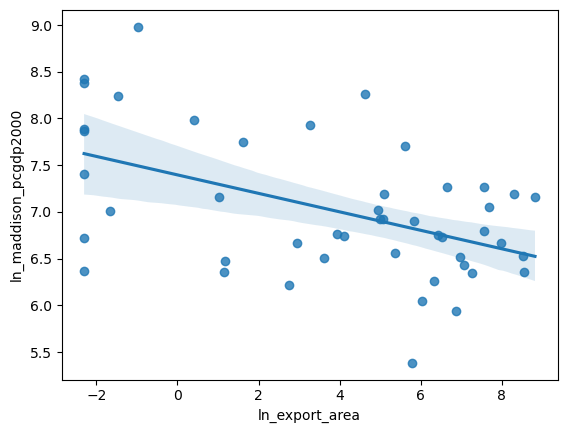

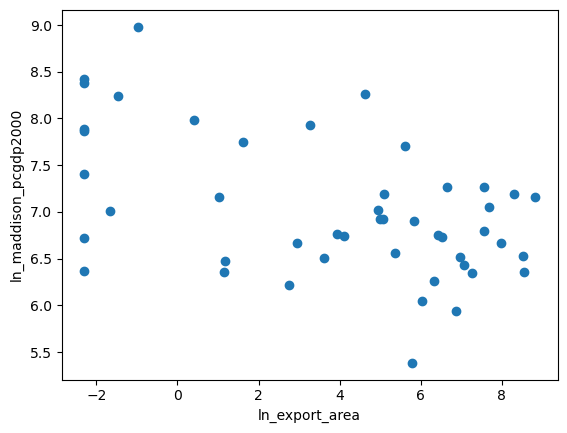

In [15]:
sns.regplot(x='ln_export_area', y='ln_maddison_pcgdp2000', data=cleaned_data)
plt.show()




plt.scatter(cleaned_data['ln_export_area'], cleaned_data['ln_maddison_pcgdp2000'])
plt.xlabel('ln_export_area')
plt.ylabel('ln_maddison_pcgdp2000')
plt.show()

In [ ]:
# Correcting the NaN replacement to maintain numeric data types
df.fillna(0, inplace=True)

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


df = pd.read_stata('/content/slave_trade_QJE.dta')
# Ensure your feature columns do not include non-numeric data. Adjust as necessary.

feature_columns = ['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]

# Check each column in feature_columns if it exists in df
for col in feature_columns:
    try:
        df[col]
    except KeyError:
        print(f"Column not found: {col}")

# Dropping any non-numeric columns for Lasso, adjust the `drop` list as needed
X = df[feature_columns].select_dtypes(include=[np.number])
y = df['ln_maddison_pcgdp2000']  # Target variable

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict and calculate mean squared error
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print('Coefficients:', lasso_model.coef_)

In [21]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

def perform_lasso_regression(df):
    # Ensure your feature columns do not include non-numeric data. Adjust as necessary.
    feature_columns = ['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]

    # Check each column in feature_columns if it exists in df
    for col in feature_columns:
        try:
            df[col]
        except KeyError:
            print(f"Column not found: {col}")

    # Dropping any non-numeric columns for Lasso, adjust the `drop` list as needed
    X = df[feature_columns].select_dtypes(include=[np.number])
    y = df['ln_maddison_pcgdp2000']  # Target variable

    # Standardizing features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(X_train, y_train)

    # Predict and calculate mean squared error
    y_pred = lasso_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print('Coefficients:', lasso_model.coef_)

# Usage:
# df = pd.read_stata('/content/slave_trade_QJE.dta')
# perform_lasso_regression(df)

In [22]:
perform_lasso_regression(cleaned_data)

Mean Squared Error: 0.4390130336098063
Coefficients: [-0.11375077 -0.         -0.         -0.         -0.05238066  0.
 -0.02015817 -0.         -0.          0.08465197 -0.          0.16949316
 -0.         -0.          0.          0.         -0.         -0.16364238
  0.          0.09776501 -0.        ]


In [23]:
cleaned_data2 = cleaned_data.copy()

'ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]

In [26]:
cleaned_data.dtypes

isocode                       object
country                       object
ln_maddison_pcgdp2000        float64
ln_export_area               float64
ln_export_pop                float64
colony0                      float64
colony1                      float64
colony2                      float64
colony3                      float64
colony4                      float64
colony5                      float64
colony6                      float64
colony7                      float64
abs_latitude                 float64
longitude                    float64
rain_min                       int64
humid_max                      int64
low_temp                       int64
ln_coastline_area            float64
island_dum                   float64
islam                        float64
legor_fr                     float64
legor_uk                     float64
region_n                     float64
region_s                     float64
region_w                     float64
region_e                     float64
r

In [25]:
cols = cleaned_data.columns

cols

Index(['isocode', 'country', 'ln_maddison_pcgdp2000', 'ln_export_area',
       'ln_export_pop', 'colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum',
       'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w',
       'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400',
       'atlantic_distance_minimum', 'indian_distance_minimum',
       'saharan_distance_minimum', 'red_sea_distance_minimum',
       'ethnic_fractionalization', 'state_dev', 'land_area',
       'predicted_export_area'],
      dtype='object')

In [28]:
import statsmodels.api as sm
from patsy import dmatrices
from linearmodels.panel import PanelOLS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [29]:
cols = cols.drop(['isocode', 'country','colony0', 'colony1', 'colony2', 'colony3', 'colony4',
       'colony5', 'colony6', 'colony7', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum',
       'islam', 'legor_fr', 'legor_uk','ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop',
       'atlantic_distance_minimum', 'indian_distance_minimum',
       'saharan_distance_minimum', 'red_sea_distance_minimum',
       'predicted_export_area'])
for var in cols:
    cleaned_data2[var] = (cleaned_data2[var] - np.min(cleaned_data2[var]))/(np.max(cleaned_data2[var]) - np.min(cleaned_data2[var]))

# Note that this will only work if your variables are named the same as mine. Adapt this to your setting.

# Note: the 'dist_loc*' variables correspond to the variables that contain the distance from listings to the touristic locations 1, 2, etc.

label_train = cleaned_data2['ln_maddison_pcgdp2000']
features_train = cleaned_data2[['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]]

label_test = cleaned_data2['ln_maddison_pcgdp2000'].copy()
features_test = cleaned_data2[['ln_export_area', 'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum', 'islam', 'legor_fr', 'region_n', 'ln_avg_gold_pop', 'ln_avg_oil_pop','ln_avg_all_diamonds_pop'] + [f'colony{i}' for i in range(8)]]

lasso_reg = Lasso()
lasso_reg.fit(features_train, label_train)
lasso_reg_cv = Lasso()

lasso_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_score = cross_val_score(lasso_reg_cv, features_train, label_train, scoring='neg_mean_squared_error', cv=lasso_cv, n_jobs=-1)
lasso_score = np.abs(lasso_score)
print('Mean MSE: %.3f (%.3f)' % (np.mean(lasso_score), np.std(lasso_score)))

Mean MSE: 0.045 (0.031)
